In [2]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
from numpy.fft import fft, ifft
import numpy as np
import scipy


#IMPORTING FUNCTIONS FROM ./defs

from defs import initDatabase

In [3]:
# IMPORT AND CONCATENATION OF ALL DATABASE 
### SETTING PATH TO THE FILES WITH CORRECT ALIAS 

# path = glob.glob("./database_raw/Dataset A/zzzA*.txt", recursive=True)
# df_final = initDatabase.initDatabase(path)
# df_final

# IMPORT FOR SINGLE DATABASE FILE
### SETTING PATH TO THE FILES WITH CORRECT ALIAS

path_single_1 = [
    "./database_raw/Dataset A/zzzAD1.txt"
];
path_single_30 = [
    "./database_raw/Dataset A/zzzAD30.txt"
];
path_single_0 = [
    "./database_raw/Dataset A/zzzAU.txt"
];

df_single_1 = initDatabase.initDatabase(path_single_1);
df_single_1 = df_single_1.astype(float);

df_single_30 = initDatabase.initDatabase(path_single_30);
df_single_30 = df_single_30.astype(float);

df_single_0 = initDatabase.initDatabase(path_single_0);
df_single_0 = df_single_0.astype(float);

df_single_1

,Time,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S22,S23,S24,S25,S26,S27,S28,S29,S30,Scenario
0,0.000000,0.004954,-0.001359,0.004767,-0.008527,-0.001187,0.004383,-0.000652,-0.031577,-0.007815,...,-0.001459,0.002673,-0.001023,0.000871,-0.003662,0.005480,-0.004954,0.003155,-0.002783,1.0
1,0.000977,-0.002692,0.013224,-0.012159,0.006356,-0.010569,0.005803,-0.010348,0.051244,-0.015238,...,-0.000039,-0.002362,0.001403,0.000519,-0.003883,-0.001152,0.009068,-0.002660,-0.000935,1.0
2,0.001953,0.010440,-0.017548,-0.002409,-0.023680,0.003805,-0.014305,0.028052,-0.001950,0.022934,...,-0.001821,0.009181,-0.000987,0.004117,-0.005031,0.006924,0.008966,0.006289,-0.002047,1.0
3,0.002930,-0.019787,0.005273,-0.003471,0.004499,-0.023611,0.004459,0.012805,0.028606,0.009633,...,0.007827,0.000538,0.009287,0.000920,-0.001098,-0.002596,0.013369,-0.001364,0.003097,1.0
4,0.003906,-0.003796,0.006211,0.000715,-0.000022,-0.008824,0.017145,0.012718,0.042087,0.010510,...,-0.005141,0.011082,-0.003525,0.011010,-0.005374,0.007329,-0.007782,0.008712,-0.000247,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262139,255.995100,-0.297023,-0.151547,-0.059725,-0.052962,-0.297202,0.107587,0.199612,0.491991,0.153046,...,0.048218,-0.073839,0.133619,0.008002,-0.060962,0.048361,0.048781,-0.092742,-0.042226,1.0
262140,255.996100,-0.176614,-0.045884,-0.260080,-0.126670,0.095408,0.062842,0.494932,-0.122551,0.560416,...,-0.121218,0.056468,-0.205697,0.151583,0.283892,0.174469,-0.123170,0.003544,0.222709,1.0
262141,255.997100,0.087201,-0.129184,-0.344268,-0.285500,-0.154741,0.191804,0.207104,0.116178,-0.001026,...,-0.168463,-0.180225,0.017537,0.009359,0.048651,-0.055765,0.149840,0.242089,-0.074097,1.0
262142,255.998000,0.075681,-0.057447,0.126385,0.144944,-0.087632,0.256604,-0.060432,0.362550,0.015992,...,-0.145095,-0.200837,-0.118993,-0.097636,-0.020304,0.162171,0.254490,-0.036783,-0.073573,1.0


In [4]:
### EDA
sampling_rate = 1024;

x_axis = df_single_1['Time'];
y_axis = df_single_1['S1'];

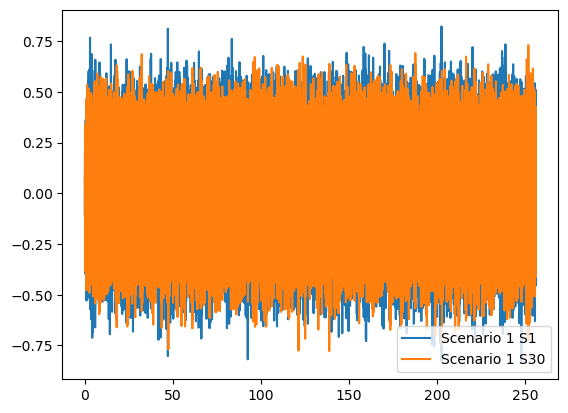

In [9]:
plt.plot(x_axis,y_axis, label="Scenario 1 S1")
plt.plot(df_single_30['Time'],df_single_30['S1'], label="Scenario 1 S30")
plt.plot(df_single_0['Time'],df_single_0['S1'], label="Scenario 0 S1")

plt.legend(["Scenario 1 S1", "Scenario 1 S30", "Scenario 0 S1"], loc ="lower right")

#plt.plot(df_single_1['Time'],df_single_1['S30'])

C:\Users\User\AppData\Local\Temp\ipykernel_17980\1112401751.py:7: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(X), 'b', \


(-100.0, 1100.0)

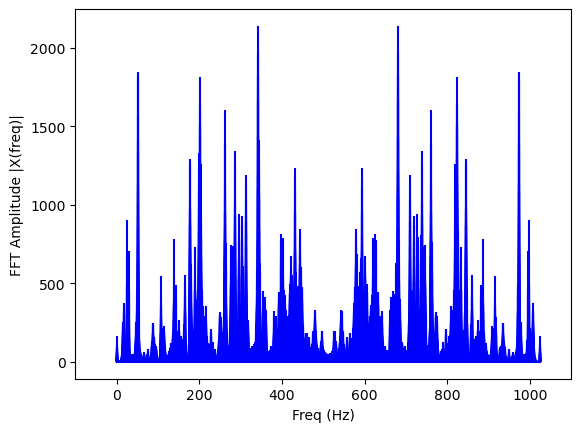

In [8]:
X = fft(y_axis)
N = len(X)
n = np.arange(N)
T = N/sampling_rate
freq = n/T

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(-100, 1100)

In [7]:
Testadd = scipy.fft(x_axis)
print(Testadd)

TypeError: 'module' object is not callable

In [ ]:
timelapse = 1024

plt.plot(df_1['Time'],df_1['S1'], label="Scenario 1 S1")
plt.plot(df_0['Time'],df_0['S1'], label="Scenario 0 S1")

plt.legend(["Scenario 1 S1", "Scenario 0 S1"])

In [ ]:
timelapse = 1024

plt.plot(df_1['Time'],df_1['S30'], label="Scenario 1 S30")
plt.plot(df_0['Time'],df_0['S30'], label="Scenario 0 S30")

plt.legend(["Scenario 1 S30", "Scenario 0 S30"])